<a href="https://colab.research.google.com/github/rocio-perez-sbarato/LLMs-for-poets/blob/main/Notebook_3_Entrenamiento_y_Prueba_del_Modelo_Nuevo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

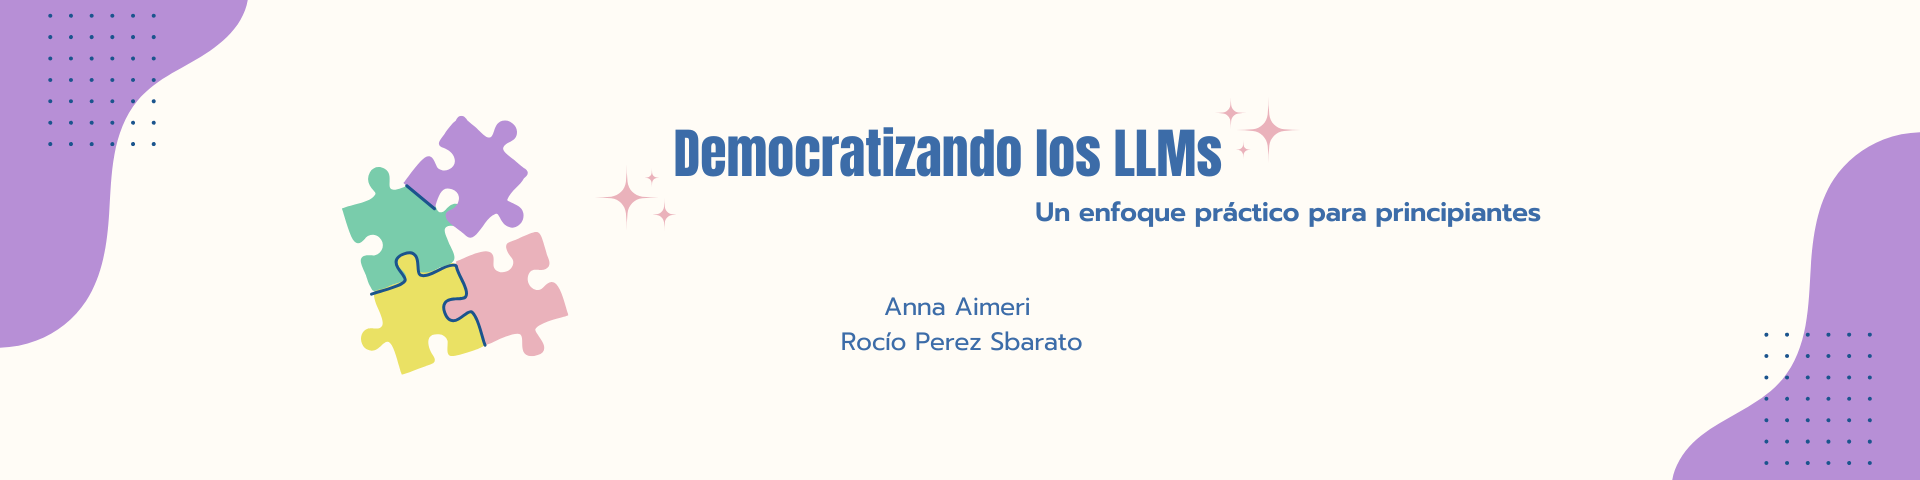

# Democratizando los LLMs: Un enfoque práctico para principiantes

**Índice**
- [Notebook 1 - Hugging Face y Librerías](https://colab.research.google.com/drive/1RNFURpgz-V3xnW2w30OWmCPyCZ3dSxOx#scrollTo=gdR-BQfAm4lc)
- [Notebook 2 - Datasets y Tokenización](https://colab.research.google.com/drive/1ln7sKvzybrjaknbzFvGN3kmjV314lrsB?usp=sharing#scrollTo=rKBG_lAukjVG)
- 👉 [Notebook 3 - Entrenamiento y Prueba del Modelo Nuevo](https://colab.research.google.com/drive/1YZ88QuSdo16o5SAiL4bE-bFy7FymnUd2#scrollTo=VY5M997phUr_)



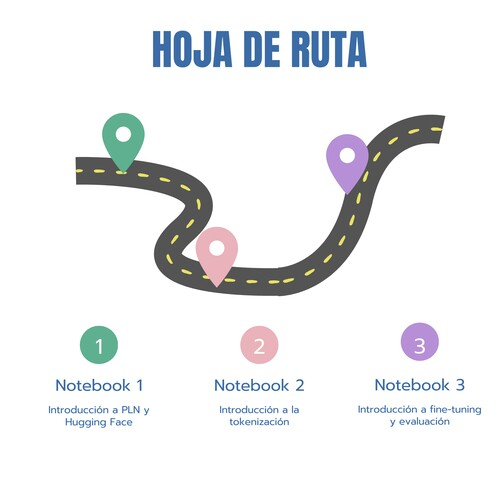

**Requerimientos deseables para entender este taller**
* Conocimiento básico de Python

**Público objetivo**
- Estos notebooks están dirigidos a investigadores, estudiantes de grado y desarrolladores interesados en resolver tareas con Modelos de Lenguaje a Gran Escala (LLMs)

**Librerías principales utilizadas**
* [Transformers](https://huggingface.co/docs/transformers/index) de [Hugging Face 🤗](https://huggingface.co)

**Sobre el proyecto** 🌟

Este proyecto tiene como objetivo **democratizar el acceso** a los Modelos de Lenguaje a Gran Escala (LLMs) mediante la creación de recursos prácticos y accesibles para principiantes. Queremos facilitar que cualquier persona, independientemente de su nivel técnico, pueda experimentar con LLMs y aplicarlos a sus propios problemas.

- [+ info sobre el proyecto](https://github.com/rocio-perez-sbarato/LLMs-for-poets)

---
---

# 🗂️ Contenidos

> *¿Cómo podrías personalizar un modelo para tu proyecto?* 🤔

## ¿Qué van a aprender? 💡

En este notebook abordaremos los siguientes temas:

📚 **Parte 1. Introducción teórica y preparación**
   - **¿Qué es el Fine-Tuning?**: Vamos a entender cómo esta técnica nos permite tomar un modelo ya entrenado y afinarlo, adaptándolo a nuestra tarea específica.
   - **¿Cómo se evalúan los modelos de lenguaje?**: Acá explicamos las métricas clave, como la pérdida (`loss`) y la `perplexity`, que nos dicen cuánto está aprendiendo el modelo.
   - **Preparando el entorno y el modelo base**: Vamos a cargar y procesar los datos como hicimos en el Notebook 2.

**🏋 Parte 2. Entrenamiento**
   - **Configuración del Modelo y los Hiperparámetros**: Ahora toca definir esos parámetros clave, como el `learning rate` y el `batch size`.
   - **Entrenamiento con `Trainer` de Hugging Face**: Arrancamos el entrenamiento usando `Trainer`. Esta herramienta nos simplifica la vida, permitiendo que configuremos y monitoreemos el aprendizaje del modelo. Vamos a ver cómo se va comportando y analizar sus métricas en tiempo real, como la pérdida y la `perplexity`.

**🔍 Parte 3. Evaluación, pruebas y guardado de nuestro nuevo modelo**
   - **Evaluación en el Conjunto de Prueba y Comparación de Resultados**: Vamos a comparar el modelo base con el fine-tuned y ver cuánto mejoró.
   - **Generación de Texto**: Ahora probamos el modelo en acción generando algunos textos.
   - **Subir el modelo a Hugging Face**: Finalmente, guardamos el modelo entrenado para compartirlo con la comunidad.

## ¿Qué habilidades se llevarán? 💪

Al finalizar este notebook, adquirirás habilidades en el fine-tuning de modelos, ajuste de hiperparámetros, y uso de herramientas como el `Trainer` de Hugging Face para entrenar, monitorear y evaluar modelos. Además, aprenderás a generar y comparar texto entre modelos base y personalizados.

---
---

# Configuración del notebook

In [ ]:
!pip install pyarrow

In [ ]:
# Instalación de librerías
!pip install -U transformers[torch] --quiet
!pip install -U tabulate --quiet
!pip install -U datasets --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


# 🖥 Chequeo de recursos

Usaremos modelos que los usuarios puedan ejecutar sin las GPU más caras disponibles o un gran presupuesto. Una cuenta gratuita de Google Colab te proporciona una GPU T4 con 16 GB de VRAM, que es la cantidad mínima de VRAM que sugerimos.

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-46d80c0f-9075-1b29-f47b-40cb0440d1a6)


# 📚 Parte 1. Introducción teórica y preparación

### ¿Qué es Fine-Tuning? 🎯

Fine-tuning, o adaptación de dominio, es una técnica de aprendizaje por transferencia que se utiliza para adaptar un modelo de lenguaje pre-entrenado a una tarea o dominio específico. Este proceso permite aprovechar el conocimiento general de un modelo existente y especializarlo para un propósito particular.

### Proceso de Fine-Tuning:

1. Selección del Modelo Base: Se elige un modelo pre-entrenado en un amplio conjunto de datos generales (por ejemplo, GPT-2 o BERT).
2. Preparación de Datos Específicos: Se recopila y prepara un conjunto de datos relacionados con la tarea o dominio objetivo.
3. Ajuste de Parámetros: Se entrena el modelo base con los nuevos datos, actualizando sus parámetros de manera controlada.
4. Evaluación y Ajuste: Se evalúa el rendimiento del modelo en la tarea específica y se ajustan los hiperparámetros según sea necesario.

### 📝 Consideraciones Importantes:

* Calidad de los Datos: La efectividad del fine-tuning depende en gran medida de la calidad y relevancia de los datos utilizados.
* Overfitting: Es crucial evitar el sobreajuste, especialmente cuando se trabaja con conjuntos de datos pequeños.
* Equilibrio: Se busca un balance entre mantener el conocimiento general y adquirir nueva información específica.

---

🔍 **Recomendación de Recursos** 🌟

- Recomendamos el notebook [Chapter 7: Finetuning To Follow Instructions](https://github.com/rasbt/LLMs-from-scratch/blob/main/ch07/01_main-chapter-code/ch07.ipynb). Es el [código](https://github.com/rasbt/LLMs-from-scratch) que acompaña al libro [Build a Large Language Model From Scratch](https://www.manning.com/books/build-a-large-language-model-from-scratch?utm_source=raschka&utm_medium=affiliate&utm_campaign=book_raschka_build_12_12_23&a_aid=raschka&a_bid=4c2437a0&chan=mm_github) de [Sebastian Raschka](https://sebastianraschka.com/)
- Recomendamos el notebook [Chapter 12 - Fine-tuning Generation Models](https://github.com/HandsOnLLM/Hands-On-Large-Language-Models/blob/main/chapter12/Chapter%2012%20-%20Fine-tuning%20Generation%20Models.ipynb). Es el [código](https://github.com/HandsOnLLM/Hands-On-Large-Language-Models/tree/main) que acompaña al libro [Hands-On Large Language Models](https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/) de [Jay Alammar](http://jalammar.github.io/)

---

## ¿Cómo se evalúan los modelos de lenguaje?

La evaluación de modelos de lenguaje es un aspecto crucial en el campo del procesamiento del lenguaje natural (PLN). Existen varias métricas y enfoques para evaluar el rendimiento de estos modelos. Vamos a explorar las principales formas de evaluación.










---

🔍 **Recomendación de Recursos** 🌟

- Recomendamos este post [Evaluation Metrics for Language Modeling](https://thegradient.pub/understanding-evaluation-metrics-for-language-models/).
- Recomendamos especialmente la sección **5.1 Evaluating generative text models** de este Jupyter Notebook: [Chapter 5: Pretraining on Unlabeled Data](https://github.com/rasbt/LLMs-from-scratch/blob/main/ch05/01_main-chapter-code/ch05.ipynb). Es el [código](https://github.com/rasbt/LLMs-from-scratch) que acompaña al libro [Build a Large Language Model From Scratch](https://www.manning.com/books/build-a-large-language-model-from-scratch?utm_source=raschka&utm_medium=affiliate&utm_campaign=book_raschka_build_12_12_23&a_aid=raschka&a_bid=4c2437a0&chan=mm_github) de [Sebastian Raschka](https://sebastianraschka.com/)

---

### Consideraciones Importantes

1. **Comparabilidad**: Es crucial especificar el nivel del modelo (carácter, palabra o subpalabra) y la longitud del contexto al reportar métricas como perplejidad.

2. **Tamaño del Vocabulario**: Afecta directamente a las métricas, por lo que debe ser considerado al comparar modelos.

3. **Preprocesamiento de Datos**: Las diferencias en el preprocesamiento pueden afectar significativamente las métricas.

4. **Límites Teóricos**: Conocer los límites teóricos de las métricas (como la entropía del lenguaje) ayuda a contextualizar los resultados.

5. **Correlación con Rendimiento Real**: Es importante recordar que un mejor rendimiento en métricas intrínsecas no siempre se traduce directamente en mejor rendimiento en tareas específicas.


### 📈 Métricas Intrínsecas

Estas métricas evalúan directamente la calidad del modelo de lenguaje en sí mismo:

#### Perplexity 😯

- Es la métrica más común para evaluar modelos de lenguaje.
- Mide qué tan bien un modelo de lenguaje predice un texto.
- Dado el texto de entrada, el modelo predice qué probabilidad hay de que aparezca el siguiente token.
- Mide qué tan "sorprendido" está el modelo por el texto de prueba.
- Cuanto menor sea la perplejidad, mejor es el modelo.

#### Cross-Entropy 😧

- Compara las probabilidades de las palabras generadas por el modelo con las palabras reales de la oración de prueba.
- Esencialmente, la pérdida nos indica cuán “confundido” está el modelo con el texto de entrada: cuanto más baja sea la pérdida, más precisa es la predicción del modelo.

#### Bits por Carácter (BPC) o Bits por Palabra (BPW) 😮

- BPC mide el número promedio de bits necesarios para codificar un carácter.
- BPW hace lo mismo pero a nivel de palabra.
- Están directamente relacionados con la entropía cruzada.

> ❗Aunque perplexity y otras métricas sobre las palabras son métricas útiles para comprender la confianza del modelo, no son una medida perfecta.
No tienen en cuenta la coherencia, la fluidez, la creatividad o incluso la corrección del texto generado.


### 🧐 Evaluación en Tareas Downstream

#### Benchmarks 🏁

Con el auge de los modelos pre-entrenados, cada vez es más común evaluar los modelos de lenguaje en función de su rendimiento en tareas específicas. Algunos ejemplos son los siguientes:

- [GLUE](https://gluebenchmark.com/)
- [MMLU](https://github.com/hendrycks/test)
- [decaNLP](https://github.com/salesforce/decaNLP)

Estos **benchmarks** incluyen tareas como:
- Análisis de sentimientos
- Reconocimiento de implicación textual
- Detección de paráfrasis
- Respuesta a preguntas
- Problemas de programación

> ❗Una desventaja de los benchmarks públicos es que los modelos pueden sobreajustarse a estos benchmarks para generar las mejores respuestas. Además, estos siguen siendo benchmarks amplios y pueden no cubrir casos de uso muy específicos.

#### Leaderboards 🏆

Se han desarrollado Leaderboards que contienen múltiples benchmarks. Un Leaderboard común es el [Open LLM Leaderboard](https://huggingface.co/spaces/open-llm-leaderboard/open_llm_leaderboard), que incluye seis benchmarks. Los modelos que encabezan el Leaderboard, suponiendo que no se hayan sobreajustado a los datos, generalmente se consideran el mejor modelo.

> ❗Dado que estos Leaderboards a menudo contienen benchmarks disponibles públicamente, existe el riesgo de overfitting.

### 🤖 Evaluación Automatizada

Para evaluar la calidad del texto generado por encima de la corrección de la
respuesta final, se introdujo la noción de *LLM-as-a-judge*. En esencia, se le pide a un LLM independiente que juzgue la calidad del LLM que se va a evaluar.

> ❗Es un método escalable y rentable. Sin embargo, para evitar que introduzcan sesgos se deben refinar los modelos evaluadores. Además, como ya hemos visto en estos notebooks, los LLMs suelen alucinar y cometer errores.

### 🧑 Evaluación Humana

En algunos casos, especialmente para tareas generativas, se utiliza la evaluación humana para juzgar la calidad, coherencia y relevancia del texto generado por el modelo.

> ❗Este tipo de evaluaciones son muy valiosas, pero requieren de organización y financiamiento adecuados para que el trabajo que los evaluadores puedan brindar sea óptimo.

### Ejemplos de evaluación usando *Perplexity* y *Cross-Entropy*

Ahora vamos a experimentar con la siguiente idea. A modo de ejemplo, al evaluar un cierto modelo con Perplexity y Cross-Entropy, sucede que dada la entrada “When a measure becomes a”, se le pregunta al modelo qué probabilidad hay de que la palabra “target” sea la siguiente palabra.




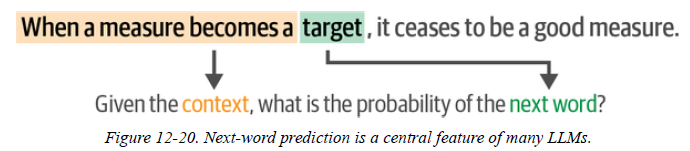

In [ ]:
from transformers import AutoTokenizer,AutoModelForCausalLM

# Cargamos el modelo
BASE_MODEL = "DeepESP/gpt2-spanish"
tokenizer = AutoTokenizer.from_pretrained(BASE_MODEL)
model = AutoModelForCausalLM.from_pretrained(BASE_MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/115 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/840k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/499k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/262 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/261M [00:00<?, ?B/s]

**Ejemplo con texto descabellado**

- Dado que el modelo de lenguaje está entrenado en patrones lingüísticos comunes, un texto incoherente y poco relacionado probablemente resultará en una Cross-Entropy Loss y Perplexity altas. Esto refleja la confusión del modelo al intentar predecir palabras que no siguen un contexto claro.

In [ ]:
import torch

# Texto descabellado
text_input_descabellado = 'Mañana llueve fuego sobre los ajedreces voladores de metal'

# Tokenización y etiquetas
toks_descabellado = tokenizer(text_input_descabellado, return_tensors='pt')
toks_descabellado['labels'] = toks_descabellado['input_ids']

# Salida del modelo
out_descabellado = model(**toks_descabellado, output_hidden_states=True, return_dict=True)

# Pérdida y Perplejidad
loss_descabellado = out_descabellado['loss'].item()
perplexity_descabellado = torch.exp(torch.tensor(loss_descabellado))

# Resultados
print(f"Texto descabellado: {text_input_descabellado}")
print(f"Cross-Entropy 😯: {loss_descabellado:.4f}")
print(f"Perplexity 😯: {perplexity_descabellado:.4f}")


Texto descabellado: Mañana llueve fuego sobre los ajedreces voladores de metal
Cross-Entropy 😯: 6.3995
Perplexity 😯: 601.5705


**Ejemplo con texto predecible**

- Un texto coherente y que sigue una estructura lógica esperada debería dar valores de Cross-Entropy Loss y Perplexity más bajos, indicando que el modelo puede hacer predicciones confiables basadas en su entrenamiento.

In [ ]:
# Texto predecible
text_input_predecible = 'Me gustan más los perros que los gatos'

# Tokenización y etiquetas
toks_predecible = tokenizer(text_input_predecible, return_tensors='pt')
toks_predecible['labels'] = toks_predecible['input_ids']

# Salida del modelo
out_predecible = model(**toks_predecible, output_hidden_states=True, return_dict=True)

# Pérdida y Perplejidad
loss_predecible = out_predecible['loss'].item()
perplexity_predecible = torch.exp(torch.tensor(loss_predecible))

# Resultados
print(f"\nTexto predecible: {text_input_predecible}")
print(f"Cross-Entropy 😯: {loss_predecible:.4f}")
print(f"Perplexity 😯: {perplexity_predecible:.4f}")



Texto predecible: Me gustan más los perros que los gatos
Cross-Entropy 😯: 2.8342
Perplexity 😯: 17.0170


## 📏 Rangos Típicos en Métricas de NLP

### Cross-Entropy Loss 📊

#### Valores Bajos (< 3.0)
* **Rango**: 0.5 - 3.0
* **Interpretación**: Buena predicción del modelo
* **Significado**: El modelo está "confiado"
* **Indica**:
  * Texto coherente y natural
  * Gramática correcta
  * Patrones lingüísticos comunes

#### Valores Altos (> 5.0)
* **Rango**: 5.0 - 10.0 o más
* **Interpretación**: Predicción pobre del modelo
* **Significado**: El modelo está "inseguro"
* **Indica**:
  * Texto incoherente o caótico
  * Gramática inusual
  * Patrones lingüísticos extraños

### Perplexity 🎯

#### Valores Bajos (< 50)
* **Rango**: 1 - 50
* **Interpretación**: Modelo seguro y preciso
* **Significado**: Predicciones confiables
* **Indica**:
  * Alta capacidad predictiva
  * Texto familiar para el modelo
  * Contexto claro

#### Valores Altos (> 100)
* **Rango**: 100 - 1000+
* **Interpretación**: Modelo confundido
* **Significado**: Alta incertidumbre
* **Indica**:
  * Baja capacidad predictiva
  * Texto confuso o sin sentido
  * Falta de contexto claro

### Regla práctica
* **Cross-Entropy**: Menor es mejor (ideal < 3.0)
* **Perplexity**: Menor es mejor (ideal < 50)
* La perplexity siempre será mayor que la cross-entropy al ser su exponencial
* Aumentos pequeños en cross-entropy resultan en aumentos grandes en perplexity

## Tokenización y Procesamiento de datos

### Tokenización

Como vimos en el notebook anterior, tokenización es el proceso de dividir el texto en unidades más pequeñas llamadas tokens. Estos pueden ser palabras, subpalabras o caracteres, dependiendo del tokenizador utilizado.
Tipos comunes de tokenización:

* Tokenización por palabras: Divide el texto en palabras individuales.
* Tokenización por subpalabras: Divide las palabras en unidades más pequeñas, útil para manejar palabras desconocidas y reducir el vocabulario.
* Tokenización por caracteres: Divide el texto en caracteres individuales.

Los modelos como GPT-2 utilizan tokenización por subpalabras, lo que permite manejar un vocabulario extenso de manera eficiente.

### Procesamiento de Datos
El procesamiento de datos implica preparar el texto tokenizado para el entrenamiento. Esto incluye:

* Conversión a IDs: Cada token se convierte en un ID numérico único.
* Padding: Se agregan tokens especiales para que todas las secuencias tengan la misma longitud.
* Truncamiento: Se recortan las secuencias que exceden una longitud máxima predefinida.
* Creación de máscaras de atención: Se generan máscaras para indicar qué tokens son reales y cuáles son padding.

In [ ]:
import torch
from transformers import AutoTokenizer

def tokenize_and_process(texts, max_length=128):
    # Cargar el tokenizador de GPT-2
    tokenizer = AutoTokenizer.from_pretrained("DeepESP/gpt2-spanish")

    # Asegurar que el tokenizador tenga un token de padding
    tokenizer.pad_token = tokenizer.eos_token

    # Tokenizar los textos
    encoded_inputs = tokenizer(
        texts,
        padding='max_length',
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

    return encoded_inputs

# Ejemplo de uso
texts = [
    "aquí me pongo a cantar",
    "al compás de la vigüela,",
    "que el hombre que lo desvela",
    "una pena estraordinaria",
    "como la ave solitaria",
    "con el cantar se consuela.",
    "pido a los santos del cielo",
    "que ayuden mi pensamiento",
    "les pido en este momento",
    "que voy a cantar mi historia",
    "me refresquen la memoria",
    "y aclaren mi entendimiento."
]

encoded_data = tokenize_and_process(texts)

print("Input IDs (tokens convertidos a números):")
print(encoded_data['input_ids'])

print("\nMáscara de atención (1 para tokens reales, 0 para padding):")
print(encoded_data['attention_mask'])

# Decodificar los IDs para ver los tokens
decoded_tokens = [tokenizer.decode(ids) for ids in encoded_data['input_ids']]
print("\nTextos decodificados:")
for text in decoded_tokens:
    print(text)

# Estadísticas
print(f"\nNúmero de secuencias: {len(encoded_data['input_ids'])}")
print(f"Longitud de cada secuencia: {len(encoded_data['input_ids'][0])}")

Input IDs (tokens convertidos a números):
tensor([[48438,   408, 18706,  ..., 50256, 50256, 50256],
        [  293, 24914,   268,  ..., 50256, 50256, 50256],
        [  295,   297,  1079,  ..., 50256, 50256, 50256],
        ...,
        [  295,  3356,   281,  ..., 50256, 50256, 50256],
        [  536, 16771, 12205,  ..., 50256, 50256, 50256],
        [   98,  9188,   275,  ..., 50256, 50256, 50256]])

Máscara de atención (1 para tokens reales, 0 para padding):
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

Textos decodificados:
aquí me pongo a cantar<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|

# 🏋 Parte 2. Entrenamiento

## ¿Cómo personalizar un modelo de lenguaje?

Cuando queremos que un modelo de lenguaje se especialice en un tema o estilo particular, tenemos tres opciones principales:

### 1. Entrenar desde cero (No recomendado)
- 👎 Requiere muchísimos recursos computacionales
- 👎 Necesita enormes cantidades de texto
- 👎 Toma semanas o meses de entrenamiento
- 👎 Muy costoso económicamente

### 2. Usar modelos especializados existentes
- ✅ Más rápido y sencillo
- ✅ Ya están probados y optimizados
- ✅ Disponibles gratuitamente
- 👎 Puede que no exista uno para tu tema específico

Algunos ejemplos:
- LegalBERT: Especializado en textos legales
- BioBERT: Para textos médicos y biológicos
- FinBERT: Para textos financieros

### 3. Adaptar un modelo existente (Recomendado)
También conocido como "fine-tuning" o "adaptación de dominio"

#### Ventajas:
- ✅ Requiere menos recursos que entrenar desde cero
- ✅ Necesita menos textos de ejemplo
- ✅ Aprovecha el conocimiento del modelo base
- ✅ Resultados muy buenos en poco tiempo

#### ¿Cómo funciona?
- Se inicia por algún modelo pre-entrenado para la tarea específica que uno busca (e.g. clasificación, generación, etc).
- Se toma un corpus especializado (anotado, revisado, etc.) y se entrena utilizando dicho corpus.
- En nuestro caso, intentaremos [entrenar que un modelo genere texto](https://github.com/huggingface/notebooks/blob/main/examples/language_modeling.ipynb) con el estilo de alguno de los conjuntos de datos disponibles para este taller.
- Utilizaremos el modelo `DeepESP/gpt2-spanish`.

#### ¿Cuándo usarlo?
Es ideal cuando queremos que el modelo se especialice en:
- Un tema específico (medicina, deportes, tecnología...)
- Un estilo de escritura particular (formal, informal, poético...)
- Un tipo de documento (reportes técnicos, cuentos infantiles...)
- Un dialecto o variante del idioma

#### Requerimientos típicos:
- Unos cientos o miles de ejemplos de texto (no millones)
- Unas horas de entrenamiento (no semanas)
- Una computadora con GPU (no un supercomputador)

## Preparación de datos para fine-tuning

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

MODELO_BASE = "DeepESP/gpt2-spanish"
tokenizer = AutoTokenizer.from_pretrained(MODELO_BASE)
model = AutoModelForCausalLM.from_pretrained(MODELO_BASE)

### Preparación de los datos

> `LONGITUD_MAXIMA`: Indica el máximo número de tokens que el modelo utilizará para codificar cada ejemplo/muestra. Debemos aumentarlo cuando los ejemplos de nuestro conjunto de datos son más largos, pero cuanto más largos son, más espacio ocupan en la memoria. Una estrategia común para determinar el tamaño máximo de tokens es realizar un histograma y quedarnos con el valor del percentil 75% del largo de los ejemplos. También podemos utilizar el número de tokens de la secuencia más larga si disponemos de suficiente capacidad de memoria.

In [ ]:
# Importar librerías necesarias
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
from tabulate import tabulate

print("🔧 Librerías cargadas correctamente.\n")

# Parámetros configurables para los datos
ARCHIVO_ENTRENAMIENTO = 'datos_entrenamiento.txt'  # @param {type:"string"}

print(f"📂 Archivo de entrenamiento: {ARCHIVO_ENTRENAMIENTO}\n")

# Datos de ejemplo
ejemplos_texto = [
    "aquí me pongo a cantar",
    "al compás de la vigüela,",
    "que el hombre que lo desvela",
    "una pena estraordinaria",
    "como la ave solitaria",
    "con el cantar se consuela.",
    "pido a los santos del cielo",
    "que ayuden mi pensamiento",
    "les pido en este momento",
    "que voy a cantar mi historia",
    "me refresquen la memoria",
    "y aclaren mi entendimiento."
]

print("📝 Datos de ejemplo cargados.\n")

print("📝 Preparando datos de entrenamiento...")

# Definir tamaños de entrenamiento y evaluación
total_size = len(ejemplos_texto)
val_size = int(total_size * 0.2)
train_size = total_size - val_size

# Dividir los datos de ejemplo en subconjuntos de entrenamiento y evaluación
train_text, eval_text = train_test_split(ejemplos_texto, test_size=val_size, random_state=42)

print("🔄 Datos divididos en subconjuntos de entrenamiento y evaluación.\n")

# Crear dataset usando la biblioteca datasets
dataset_dict = DatasetDict({
    'train': Dataset.from_dict({'samples': train_text}),
    'eval': Dataset.from_dict({'samples': eval_text})
})

print("📊 Dataset creado con éxito: entrenamiento y evaluación.\n")

# Crear tabla de conteo de datos
tabla_conteo = [
    ["Entrenamiento", len(train_text)],
    ["Evaluación", len(eval_text)]
]
print("\n🔢 Cantidad de datos en cada subconjunto:")
print(tabulate(tabla_conteo, headers=["Conjunto", "Cantidad de datos"], tablefmt="pretty"))

# Guardar ejemplos de entrenamiento en archivo
print(f"💾 Guardando datos de entrenamiento en el archivo: {ARCHIVO_ENTRENAMIENTO}")
with open(ARCHIVO_ENTRENAMIENTO, 'w', encoding='utf-8') as f:
    for ejemplo in train_text:
        f.write(ejemplo + "\n\n")  # Agregar doble salto de línea para mejor separación

# Verificar que el archivo se creó correctamente
with open(ARCHIVO_ENTRENAMIENTO, 'r', encoding='utf-8') as f:
    contenido = f.read()
    print(f"✅ Archivo creado con {len(train_text)} ejemplos")
    print(f"📊 Tamaño del archivo: {len(contenido)} caracteres")

# Mostrar la estructura del dataset
print("\n🔍 Estructura del dataset (entrenamiento y evaluación):")
print(dataset_dict)
print("\n")

🔧 Librerías cargadas correctamente.

📂 Archivo de entrenamiento: datos_entrenamiento.txt

📝 Datos de ejemplo cargados.

📝 Preparando datos de entrenamiento...
🔄 Datos divididos en subconjuntos de entrenamiento y evaluación.

📊 Dataset creado con éxito: entrenamiento y evaluación.


🔢 Cantidad de datos en cada subconjunto:
+---------------+-------------------+
|   Conjunto    | Cantidad de datos |
+---------------+-------------------+
| Entrenamiento |        10         |
|  Evaluación   |         2         |
+---------------+-------------------+
💾 Guardando datos de entrenamiento en el archivo: datos_entrenamiento.txt
✅ Archivo creado con 10 ejemplos
📊 Tamaño del archivo: 267 caracteres

🔍 Estructura del dataset (entrenamiento y evaluación):
DatasetDict({
    train: Dataset({
        features: ['samples'],
        num_rows: 10
    })
    eval: Dataset({
        features: ['samples'],
        num_rows: 2
    })
})




### Tokenización de los datos

In [ ]:
# Parámetros configurables para los datos
LONGITUD_MAXIMA = 128  # @param {type:"slider", min:64, max:512, step:64}

print(f"📏 Longitud máxima de los textos: {LONGITUD_MAXIMA}")

# Definir la función de tokenización
def tokenize_data_fn(batch):
    print(f"🔄 Tokenizando datos...")
    tokenized_sample = tokenizer(
        batch['samples'],
        max_length=LONGITUD_MAXIMA,
        truncation=True,
        padding='max_length',
        return_tensors='pt',
    )
    tokenized_sample["labels"] = tokenized_sample['input_ids'].clone()
    return tokenized_sample

print("✅ Función de tokenización definida.\n")

# Aplicar tokenización a cada subconjunto
print("🛠️ Aplicando tokenización a los datos de entrenamiento y evaluación...")

tokenized_gpt2_ds = DatasetDict({
    'train': dataset_dict['train'].map(
        tokenize_data_fn, batched=True, remove_columns=["samples"]
    ),
    'eval': dataset_dict['eval'].map(
        tokenize_data_fn, batched=True, remove_columns=["samples"]
    )
})

print("✅ Tokenización aplicada a los datos.\n")

# Mostrar el dataset tokenizado
print("\n🔍 Dataset tokenizado (entrenamiento y evaluación):")
print(tokenized_gpt2_ds)


📏 Longitud máxima de los textos: 128
✅ Función de tokenización definida.

🛠️ Aplicando tokenización a los datos de entrenamiento y evaluación...


Map:   0%|          | 0/10 [00:00<?, ? examples/s]

🔄 Tokenizando datos...


Map:   0%|          | 0/2 [00:00<?, ? examples/s]

🔄 Tokenizando datos...
✅ Tokenización aplicada a los datos.


🔍 Dataset tokenizado (entrenamiento y evaluación):
DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 10
    })
    eval: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 2
    })
})


### Mirando más de cerca nuestro dataset

In [ ]:
# Función para ver los textos originales y los tokenizados
def compare_before_after_tokenization(texts):
    # Tokenizar los textos
    tokenized_texts = tokenizer(texts,
                                padding=True,
                                truncation=True,
                                max_length=LONGITUD_MAXIMA,
                                return_tensors='pt')

    # Mostrar algunos ejemplos antes y después de la tokenización
    for i in range(min(3, len(texts))):  # Mostrar hasta 3 ejemplos
        print(f"Texto original: {texts[i]}")
        print(f"Tokens: {tokenized_texts['input_ids'][i]}")
        print(f"Texto reconstruido (decodificado): {tokenizer.decode(tokenized_texts['input_ids'][i])}")
        print("\n")

# Comparar textos antes y después de la tokenización
compare_before_after_tokenization(ejemplos_texto)


Texto original: aquí me pongo a cantar
Tokens: tensor([48438,   408, 18706,   281, 10709, 50256, 50256, 50256])
Texto reconstruido (decodificado): aquí me pongo a cantar<|endoftext|><|endoftext|><|endoftext|>


Texto original: al compás de la vigüela,
Tokens: tensor([  293, 24914,   268,   288,  3273,  1641,  8098,    21])
Texto reconstruido (decodificado): al compás de la vigüela,


Texto original: que el hombre que lo desvela
Tokens: tensor([  295,   297,  1079,   299,   396,   395,  2654, 50256])
Texto reconstruido (decodificado): que el hombre que lo desvela<|endoftext|>




## Configuración del modelo base y del entrenamiento

**Detalles de parámetros a configurar**
1.   ***epochs***: Número de épocas de entrenamiento. En cada epoch, el algoritmo de entrenamiento recibe cada uno de los ejemplos del dataset de entrenamiento.
2.  ***batch_size***: Cantidad de datos procesados por iteración antes de actualizar el modelo (aumentar este número mejora las estimaciones de cada iteración ya que será una muestra más representativa del dataset en general, pero requerirá más memoria y será necesario monitorizar y re-ajustar el `learning_rate`)
3.  ***learning_rate***:  Tamaño del ''ajuste'' realizado en el modelo en cada iteración, mientras se avanza hacia un mínimo de la función de pérdida.

> ❗ El valor de estos parámetros, en conjunción al poder de cómputo disponible, determinará el tiempo y la cantidad de cálculo requerido para poder realizar el entrenamiento del modelo. Puede ir desde unos segundos hasta varios minutos.

In [ ]:
# @markdown ❗ **Configuración de hiperparámetros de entrenamiento**

from transformers import Trainer, TrainingArguments, AutoModelForCausalLM

print("⚙️ Configurando el proceso de fine-tuning...")

# 1. Configuración de hiperparámetros
LEARNING_RATE = 2e-5  # @param {type:"number"}
BATCH_SIZE = 64  # @param {type:"slider", min:8, max:64, step:8}
EPOCHS = 10  # @param {type:"slider", min:3, max:15, step:1}
model_name = "modelo-personalizado"

# Configuración de entrenamiento
training_args = TrainingArguments(
    output_dir=model_name,
    evaluation_strategy='epoch',
    num_train_epochs=EPOCHS,
    learning_rate=LEARNING_RATE,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    weight_decay=0.01,
    logging_steps=5,
    report_to="none"  # Desactiva wandb u otros reportes
)

# Instanciación de modelo y clase Trainer
model = AutoModelForCausalLM.from_pretrained(MODELO_BASE)
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_gpt2_ds['train'],
    eval_dataset=tokenized_gpt2_ds['eval']
)

print("✅ Configuración completada, listo para entrenar")

⚙️ Configurando el proceso de fine-tuning...


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


✅ Configuración completada, listo para entrenar


## Entrenamiento

In [ ]:
# @markdown ❗ **Fine-tuning del modelo**

from transformers import Trainer, TrainingArguments
import math

# 2. Realizar el fine-tuning
print("\n🚀 Iniciando proceso de fine-tuning...")
trainer.train()


🚀 Iniciando proceso de fine-tuning...


model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

Epoch,Training Loss,Validation Loss
1,No log,2.493114
2,No log,0.445055
3,No log,0.276525
4,No log,0.266913
5,1.864700,0.261775
6,1.864700,0.257168
7,1.864700,0.253310
8,1.864700,0.250397
9,1.864700,0.248422
10,0.276300,0.247419


TrainOutput(global_step=10, training_loss=1.0704809427261353, metrics={'train_runtime': 15.7026, 'train_samples_per_second': 6.368, 'train_steps_per_second': 0.637, 'total_flos': 6532300800000.0, 'train_loss': 1.0704809427261353, 'epoch': 10.0})

## Evaluación

In [ ]:
# @markdown ❗ **Evaluación del modelo**

# 3. Evaluación del modelo
print("\n📊 Evaluando el modelo...")
eval_results = trainer.evaluate()
perplexity = math.exp(eval_results['eval_loss'])

print(f"\nMétricas de evaluación:")
print(f"- Pérdida (Loss): {eval_results['eval_loss']:.2f}")
print(f"- Perplejidad: {perplexity:.2f}")


📊 Evaluando el modelo...



Métricas de evaluación:
- Pérdida (Loss): 0.25
- Perplejidad: 1.28


## Guardado local

In [ ]:
# @markdown ❗ **Guardado del modelo nuevo**

# 4. Guardar el modelo adaptado

NOMBRE_MODELO_SALIDA = "modelo-personalizado"  # Nombre de salida del modelo

print("\n💾 Guardando modelo...")
trainer.save_model(NOMBRE_MODELO_SALIDA)
tokenizer.save_pretrained(NOMBRE_MODELO_SALIDA)

print("✅ Fine-tuning completado, modelo evaluado y guardado")


💾 Guardando modelo...
✅ Fine-tuning completado, modelo evaluado y guardado


# 🔍 Parte 3. Pruebas y publicación de nuestro nuevo modelo

## Comparando modelos

In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the tokenizer and models
tokenizer = AutoTokenizer.from_pretrained(MODELO_BASE)
modelo_base = AutoModelForCausalLM.from_pretrained(MODELO_BASE).to(device)
modelo_adaptado = AutoModelForCausalLM.from_pretrained(NOMBRE_MODELO_SALIDA).to(device)

def comparar_modelos(prompt, modelo_base, modelo_adaptado, tokenizer, device, max_length=128):
    print(f"🔄 Comparando generación para: '{prompt}'\n")

    # Generate with the base model
    modelo_base.eval()
    inputs_base = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=max_length).to(device)
    outputs_base = modelo_base.generate(
        inputs_base["input_ids"],
        max_length=100,
        num_return_sequences=1,
        temperature=0.7,
        do_sample=True,
        attention_mask=inputs_base["attention_mask"],
        pad_token_id=tokenizer.pad_token_id
    )
    texto_base = tokenizer.decode(outputs_base[0], skip_special_tokens=True)

    # Generate with the adapted model
    modelo_adaptado.eval()
    inputs_adaptado = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True, max_length=max_length).to(device)
    outputs_adaptado = modelo_adaptado.generate(
        inputs_adaptado["input_ids"],
        max_length=100,
        num_return_sequences=1,
        temperature=0.7,
        do_sample=True,
        attention_mask=inputs_adaptado["attention_mask"],
        pad_token_id=tokenizer.pad_token_id
    )
    texto_adaptado = tokenizer.decode(outputs_adaptado[0], skip_special_tokens=True)

    # Display results
    print("Modelo Base:")
    print(f"'{texto_base}'\n")
    print("Modelo Adaptado:")
    print(f"'{texto_adaptado}'")


# Test comparison with a sample prompt
PROMPT_COMPARACION = "Sean los hermanos unidos porque"  # @param {type:"string"}
# Llamar a la función comparar_modelos con los parámetros correspondientes
comparar_modelos(PROMPT_COMPARACION, modelo_base, modelo_adaptado, tokenizer, device, max_length=128)



🔄 Comparando generación para: 'Sean los hermanos unidos porque'

Modelo Base:
'Sean los hermanos unidos porque eran hermanos. 

—Bueno, pues que lo que nos digan los padres. 

—Lo siento, no tengo nada que disculpar. 

—Bueno, no lo sientas. 

—¿Acaso no quieres que lo haga? 

—No, no quiero. 

—Pues vete a saber qué le pasa a tu hija. 

—¿Quieres que te diga la verdad? 

—¿Qué quieres? 

—Que si quieres que te diga'

Modelo Adaptado:
'Sean los hermanos unidos porque se acercan a una nueva vida juntos. 

—Gracias por lo de mi hermana, pero no me puedo rendir ahora. 

—No te preocupes por eso. 

—No pasa nada, no pasa nada. 

—No me queda otra. 

—¿Está bien? 

—Sí, lo está. 

—Pero ella no me deja. 

—No me lo puedo creer. 

—Ella no me deja. 

'


## *Testbed*

Si queremos evaluar qué tanto se adapta un modelo a un dominio determinado, podemos estimar su perplejidad para las tareas de completar palabras (MLM) o generación de texto en oraciones del dominio de interés, ya sea sobre conjunto de oraciones que nos interesen particularmente (un benchmark o testbed) o sobre un corpus representativo del dominio en general.
- Sería una buena idea comparar perplexity de cada modelo con unas frases en particular.

### Probando con varias frases



Este código compara las respuestas generadas por dos modelos de lenguaje (base y adaptado) a partir del mismo texto inicial (`prompt`). Ambos modelos generan un texto utilizando un `tokenizer` y parámetros similares. Luego, muestra las respuestas de cada modelo para poder evaluar las diferencias entre ellos.

In [ ]:
import os
import transformers
from transformers import pipeline
from typing import List
from tabulate import tabulate


# Función auxiliar para comparar predicciones de modelos
def compare_models(
    custom_model: transformers.pipelines.text_generation.TextGenerationPipeline,
    base_model: transformers.pipelines.text_generation.TextGenerationPipeline,
    prompts: List[str],
    max_length=50,
    num_return_sequences=1
) -> None:

    headers = ['Prompt', 'Custom GPT-2', 'Base GPT-2']
    rows = []

    for prompt in prompts:
        # Generación de texto para el modelo personalizado
        custom_outputs = custom_model(prompt, max_length=max_length, num_return_sequences=num_return_sequences)
        base_outputs = base_model(prompt, max_length=max_length, num_return_sequences=num_return_sequences)

        # Extracción de textos generados
        custom_texts = [out['generated_text'] for out in custom_outputs]
        base_texts = [out['generated_text'] for out in base_outputs]

        # Agregar filas para visualización
        for c_text, b_text in zip(custom_texts, base_texts):
            rows.append([prompt, c_text, b_text])

    # Imprimir tabla de comparación
    table = tabulate(rows, headers=headers, tablefmt="grid")
    print(table, "\n")

# Instanciación de modelo base en español y modelo personalizado
base_model = pipeline(task="text-generation", model=MODELO_BASE)
custom_model = pipeline(task="text-generation", model=NOMBRE_MODELO_SALIDA)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
# Conjunto de ejemplos de prueba para GPT-2

martin_fierro_test_examples = [
    "En los campos de la pampa extensa,",
    "donde el viento y el sol se encuentran,",
    "cabalgo firme con mi caballo",
    "bajo el cielo risueño de Argentina,",
    "Con mi lanza y mi lazo,"
]

compare_models(
    custom_model=custom_model,
    base_model=base_model,
    prompts=martin_fierro_test_examples
)


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


+-----------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Prompt                                  | Custom GPT-2                                                                                                                                                                              | Base GPT-2                                                                                                                                                                                                                                       |
+=========================================+=======

## ¿Cómo compartir mi modelo entrenado? 🚀

Una de las mejores formas de compartir tu modelo personalizado es subirlo a Hugging Face.

---
❗**Atención**

- Las instrucciones proporcionadas en esta guía reflejan el estado actual de la plataforma Hugging Face y sus herramientas. Sin embargo, es posible que Hugging Face actualice su ecosistema, sus interfaces o procedimientos en el futuro, lo que podría hacer que algunas partes de esta guía queden desactualizadas.
- Te recomendamos consultar siempre la [documentación oficial](https://huggingface.co/docs/transformers/v4.15.0/model_sharing) de Hugging Face para asegurarte de que estás utilizando las prácticas más recientes.
---









### Paso 1: Crear una cuenta en Hugging Face 📝
1. Ve a [huggingface.co/join](https://huggingface.co/join)
2. Registrate con tu correo o cuenta de GitHub

### Paso 2: Crear un token de acceso 🔑
Para poder subir tu modelo necesitas un token especial, como una llave que te da permisos para subir archivos:

1. Dirigite a la [sección de tokens](https://huggingface.co/settings/tokens)
2. Ir a "Create new token"
3. Dale un nombre a tu token (por ejemplo "token-para-subir-modelos")
4. Seleccioná "Write" en los permisos
5. Copiá el token que te dan (lo vas a necesitar en el siguiente paso)

### Paso 3: Subir tu modelo 📤

In [ ]:
# @markdown ❗ Subí tu modelo a Hugging Face
from huggingface_hub import notebook_login

# Primero necesitás loguearte (solo una vez)
notebook_login()

# Para subir el modelo, simplemente usá:
trainer.push_to_hub(
    "tu-usuario/nombre-de-tu-modelo",  # Por ejemplo "mi-gpt2-poesia"
)

# También subimos el tokenizador
tokenizer.push_to_hub("nombre-de-tu-modelo")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.24k [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/annaaimeri/nombre-de-tu-modelo/commit/059a0b6bb4c95e86ee9b22bdc39c92c3fc4f12f8', commit_message='Upload tokenizer', commit_description='', oid='059a0b6bb4c95e86ee9b22bdc39c92c3fc4f12f8', pr_url=None, pr_revision=None, pr_num=None)

### Paso 4: Compartir tu modelo 🌎

Una vez subido, podés:
- Compartir el link de tu modelo (ejemplo: huggingface.co/tu-usuario/nombre-de-tu-modelo)
- Permitir que otros lo usen en sus proyectos
- Crear un espacio de demostración (Space) para que cualquiera pruebe tu modelo
- Recibir comentarios y sugerencias de la comunidad

## Consejos útiles 💡
- Elegí un nombre descriptivo para tu modelo
- Agregá una buena descripción que explique para qué sirve
- Incluí ejemplos de uso
- Mencioná el modelo base que usaste
- Describí los datos con los que lo entrenaste (sin compartir datos sensibles)
- Actualizá tu modelo cuando lo mejores



### Usando tu modelo compartido 🔄
Otros podrán usar tu modelo así:

```
from transformers import AutoModelForCausalLM, AutoTokenizer

# Cargar tu modelo
modelo = AutoModelForCausalLM.from_pretrained("tu-usuario/nombre-de-tu-modelo")
tokenizer = AutoTokenizer.from_pretrained("tu-usuario/nombre-de-tu-modelo")

# Usarlo para generar texto
texto = "Tu modelo es"
salida = tokenizer.decode(
    modelo.generate(
        tokenizer.encode(texto, return_tensors="pt"),
        max_length=50
    )[0]
)
print(salida)
```




# Referencias

- Jurafsky, D., & Martin, J. (2019). *Speech and Language Processing*. Capítulos 2, 3, 9 y 10. Disponible para descargar de manera gratuita en [Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/).
- Alammar, J., & Grootendorst, M. (2024). Hands-On Large Language Models. O'Reilly. Capítulo 2. Disponible en [Hands-On Large Language Models](https://www.oreilly.com/library/view/hands-on-large-language/9781098150952/).

# 📨 Formulario de feedback

In [ ]:
# @markdown ¡Ejecutá esta celda para enviarnos tu feedback!

from IPython.display import HTML
HTML(
    """
<iframe
  src="https://forms.gle/e2hcE64wfvXob5pj6",
  width="80%"
  height="1200px" >
  Loading...
</iframe>
"""
)